# Rainfall Weather Forecasting

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [133]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [134]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [135]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [1]:
# First I will balance the data :

In [136]:
No_rain_tomorrow = df[df['RainTomorrow']=='No']
Yes_rain_tomorrow = df[df['RainTomorrow']=='Yes']

In [137]:
sample = No_rain_tomorrow.sample(2000, random_state = 42)
new_df = pd.concat([sample , Yes_rain_tomorrow])
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4011,2016-09-21,Williamtown,12.2,20.3,0.6,3.6,NaN,NaN,NaN,N,...,90.0,83.0,1013.9,1007.9,8.0,7.0,13.5,16.9,No,No
3187,2016-10-19,Williamtown,10.2,24.0,0.0,7.4,NaN,SE,35.0,WNW,...,56.0,47.0,1017.9,1016.6,4.0,NaN,18.1,21.1,No,No
2213,2015-05-05,Newcastle,15.1,26.8,0.0,NaN,NaN,NaN,NaN,N,...,90.0,46.0,NaN,NaN,1.0,1.0,18.4,26.0,No,No
6997,2011-02-01,PerthAirport,17.9,30.7,0.4,6.8,12.4,E,41.0,E,...,46.0,37.0,1013.1,1008.4,0.0,0.0,21.8,29.1,No,No
1627,2013-09-26,Newcastle,12.8,35.0,0.0,NaN,NaN,NaN,NaN,NW,...,45.0,16.0,NaN,NaN,0.0,0.0,23.0,33.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,...,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,...,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [138]:
new_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [139]:
new_df.drop('Date', axis = 1, inplace = True)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4011,Williamtown,12.2,20.3,0.6,3.6,NaN,NaN,NaN,N,SSE,...,90.0,83.0,1013.9,1007.9,8.0,7.0,13.5,16.9,No,No
3187,Williamtown,10.2,24.0,0.0,7.4,NaN,SE,35.0,WNW,ESE,...,56.0,47.0,1017.9,1016.6,4.0,NaN,18.1,21.1,No,No
2213,Newcastle,15.1,26.8,0.0,NaN,NaN,NaN,NaN,N,N,...,90.0,46.0,NaN,NaN,1.0,1.0,18.4,26.0,No,No
6997,PerthAirport,17.9,30.7,0.4,6.8,12.4,E,41.0,E,WSW,...,46.0,37.0,1013.1,1008.4,0.0,0.0,21.8,29.1,No,No
1627,Newcastle,12.8,35.0,0.0,NaN,NaN,NaN,NaN,NW,SW,...,45.0,16.0,NaN,NaN,0.0,0.0,23.0,33.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,NW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,NNW,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,NNW,...,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,NNW,...,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [140]:
new_df['Location'].value_counts()

Melbourne       746
Williamtown     575
PerthAirport    551
Albury          442
Newcastle       408
CoffsHarbour    324
Brisbane        277
Wollongong      236
Penrith         218
Adelaide        100
Darwin          100
Uluru            14
Name: Location, dtype: int64

# Checking the data :

In [141]:
rainfall_tomorrow_by_location = new_df.groupby('Location')['RainTomorrow'].value_counts()
rainfall_tomorrow_by_location

Location      RainTomorrow
Adelaide      No               55
              Yes              45
Albury        No              243
              Yes             199
Brisbane      No              142
              Yes             135
CoffsHarbour  Yes             186
              No              138
Darwin        No               68
              Yes              32
Melbourne     Yes             406
              No              340
Newcastle     No              210
              Yes             198
Penrith       Yes             116
              No              102
PerthAirport  No              309
              Yes             242
Uluru         No               14
Williamtown   Yes             306
              No              269
Wollongong    Yes             126
              No              110
Name: RainTomorrow, dtype: int64

In [142]:
TodayRain_Vs_TomorrowRain = new_df.groupby('RainToday')['RainTomorrow'].value_counts()
TodayRain_Vs_TomorrowRain

RainToday  RainTomorrow
No         No              1666
           Yes              978
Yes        Yes              946
           No               321
Name: RainTomorrow, dtype: int64

In [143]:
new_df['WindDir9am'].value_counts()

N      455
SW     360
NW     297
WSW    244
WNW    233
SE     233
SSW    218
W      215
NNE    212
NE     204
S      187
SSE    173
ENE    169
E      152
NNW    132
ESE    131
Name: WindDir9am, dtype: int64

In [144]:
WindDirection9amp_Vs_RainTomorrow = new_df.groupby('WindDir9am')['RainTomorrow'].value_counts()
WindDirection9amp_Vs_RainTomorrow

WindDir9am  RainTomorrow
E           No              104
            Yes              48
ENE         No              105
            Yes              64
ESE         No               69
            Yes              62
N           Yes             298
            No              157
NE          No              119
            Yes              85
NNE         Yes             115
            No               97
NNW         Yes              72
            No               60
NW          No              166
            Yes             131
S           No               99
            Yes              88
SE          No              139
            Yes              94
SSE         No              102
            Yes              71
SSW         Yes             116
            No              102
SW          Yes             198
            No              162
W           Yes             112
            No              103
WNW         Yes             136
            No               97
WSW         Yes

In [145]:
WindDirection3pm_Vs_RainTomorrow = new_df.groupby('WindDir3pm')['RainTomorrow'].value_counts()
WindDirection3pm_Vs_RainTomorrow

WindDir3pm  RainTomorrow
E           No              114
            Yes              94
ENE         Yes              89
            No               87
ESE         No              131
            Yes              88
N           Yes             143
            No              127
NE          No              132
            Yes             110
NNE         No               87
            Yes              83
NNW         Yes             108
            No               54
NW          Yes             127
            No              111
S           Yes             179
            No              170
SE          No              194
            Yes             180
SSE         No              165
            Yes             126
SSW         Yes             130
            No               68
SW          Yes             114
            No              108
W           No              134
            Yes              97
WNW         No              117
            Yes             100
WSW         Yes

In [146]:
WindGustDirection_Vs_RainTomorrow = new_df.groupby('WindGustDir')['RainTomorrow'].value_counts()
WindGustDirection_Vs_RainTomorrow

WindGustDir  RainTomorrow
E            No              155
             Yes              67
ENE          No               99
             Yes              64
ESE          No               72
             Yes              66
N            Yes             198
             No              146
NE           No               87
             Yes              83
NNE          Yes              89
             No               87
NNW          Yes              64
             No               54
NW           Yes             102
             No               87
S            Yes             147
             No              122
SE           No              121
             Yes             106
SSE          No              137
             Yes             134
SSW          Yes             113
             No               84
SW           Yes             152
             No              120
W            No              142
             Yes             107
WNW          Yes             135
             No  

In [147]:
new_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# EDA :

# Maximum  , Minimum Temperature  :

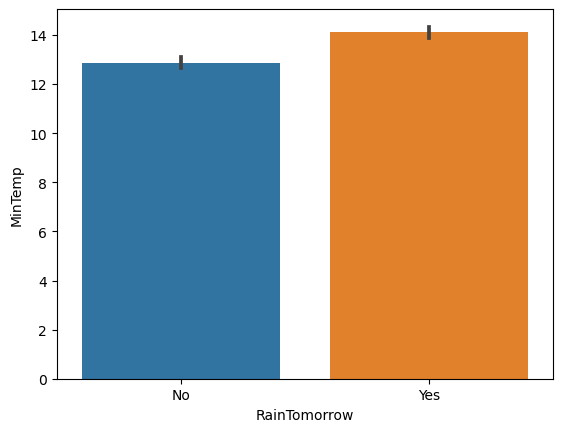

In [148]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'MinTemp' )
plt.show()

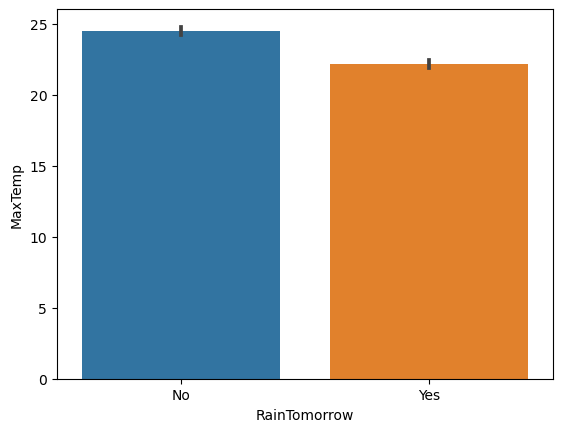

In [149]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'MaxTemp' )
plt.show()

# Rainfall :

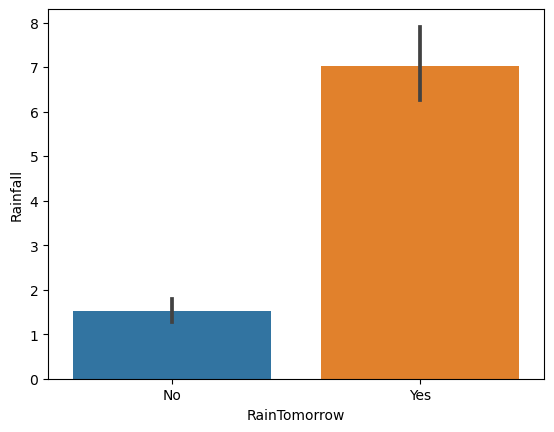

In [150]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Rainfall' )
plt.show()

# Evaporation :

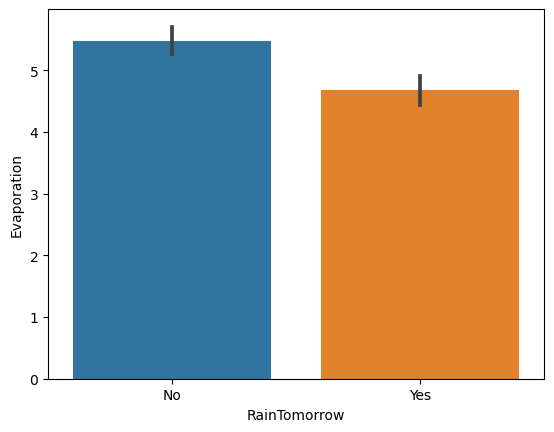

In [151]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Evaporation' )
plt.show()

# Sunshine :

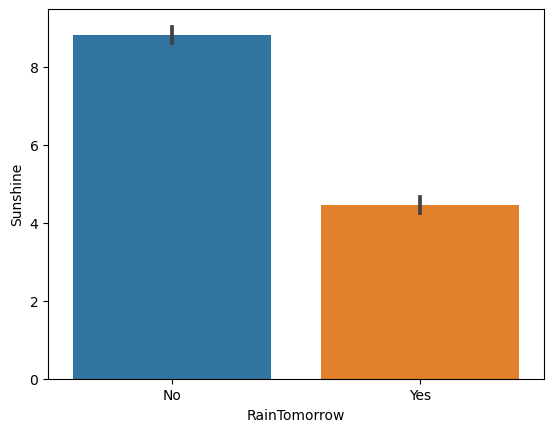

In [152]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Sunshine' )
plt.show()

# WindGustSpeed :

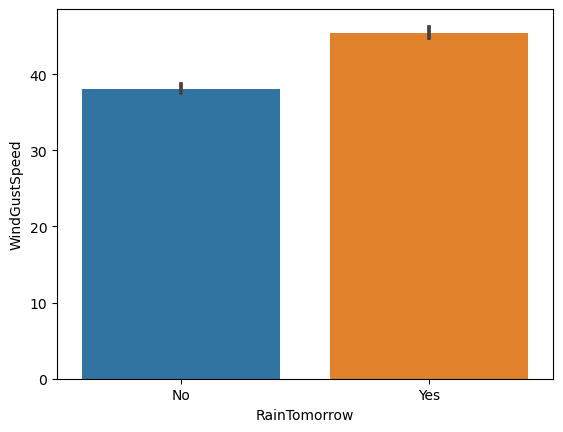

In [153]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'WindGustSpeed' )
plt.show()

# WindSpeed :

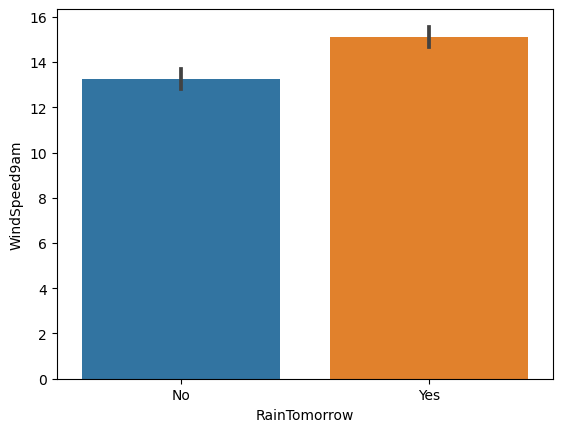

In [154]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'WindSpeed9am' )
plt.show()

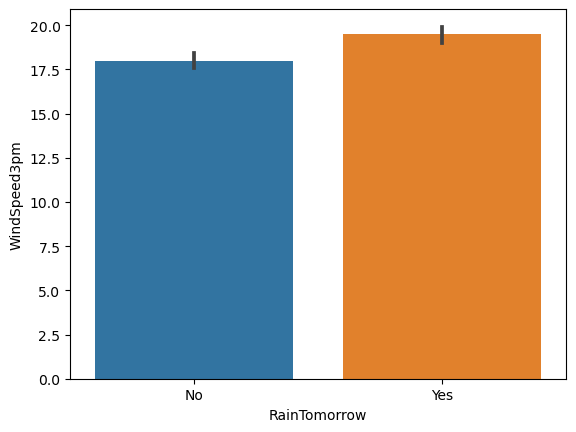

In [155]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'WindSpeed3pm' )
plt.show()

# Pressure :

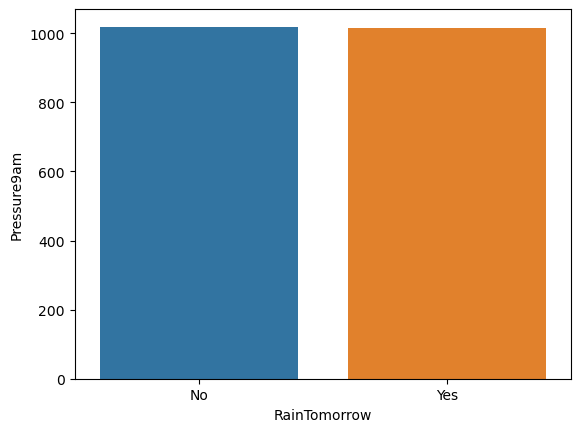

In [156]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Pressure9am' )
plt.show()

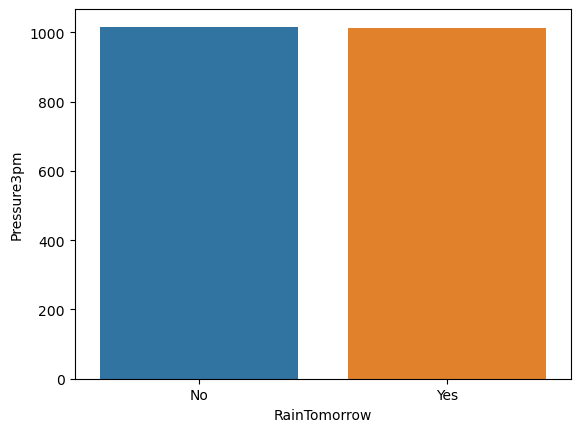

In [157]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Pressure3pm' )
plt.show()

# Temperature :

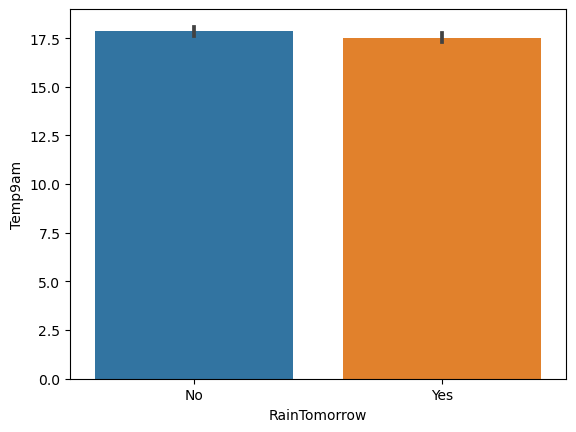

In [158]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Temp9am' )
plt.show()

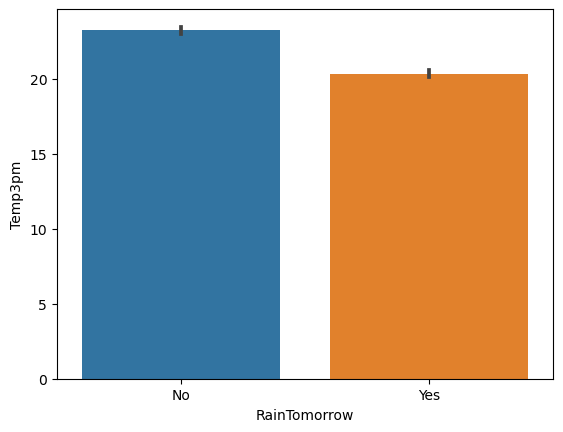

In [159]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Temp3pm' )
plt.show()

# Cloud :

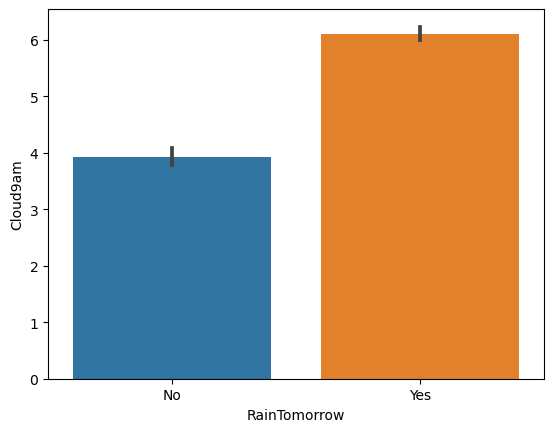

In [160]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Cloud9am' )
plt.show()

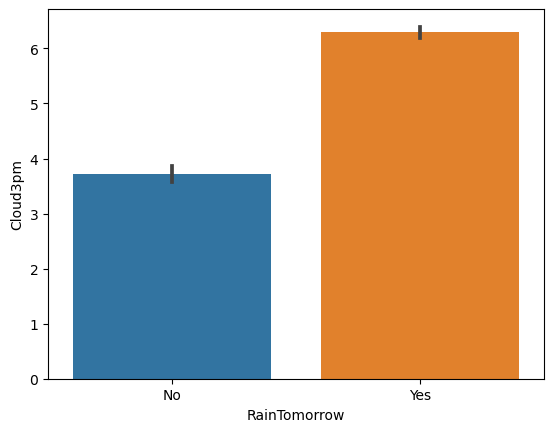

In [161]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Cloud3pm' )
plt.show()

# Humidity :

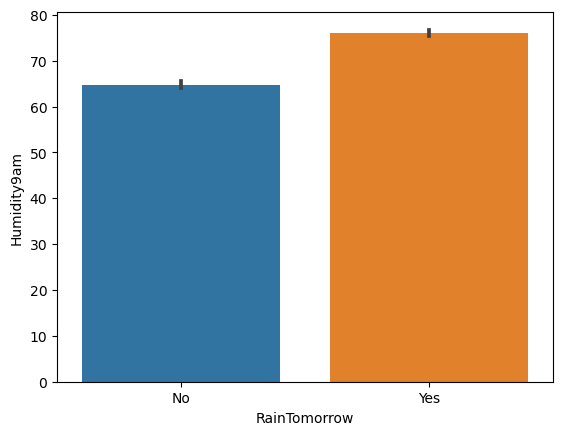

In [162]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Humidity9am' )
plt.show()

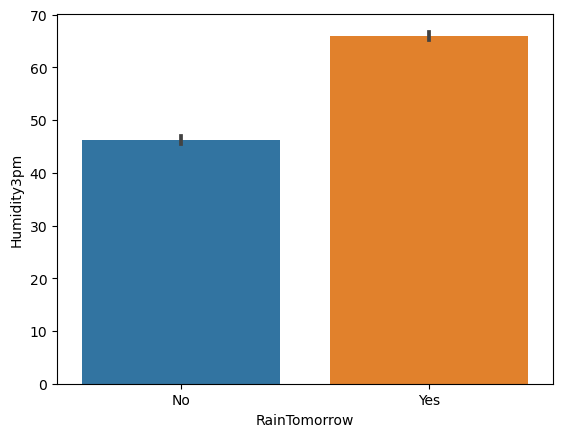

In [163]:
sns.barplot(data =  new_df , x = 'RainTomorrow', y = 'Humidity3pm')
plt.show()

In [164]:
new_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [2]:
# So, analysing the columns , I will select some most important columns :

In [165]:
Unimportant_columns = ['Location', 'MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm','Evaporation']
Modified_df = new_df.drop(Unimportant_columns, axis = 1)
Modified_df

,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
4011,0.6,NaN,NaN,N,SSE,90.0,83.0,8.0,7.0,No,No
3187,0.0,NaN,SE,WNW,ESE,56.0,47.0,4.0,NaN,No,No
2213,0.0,NaN,NaN,N,N,90.0,46.0,1.0,1.0,No,No
6997,0.4,12.4,E,E,WSW,46.0,37.0,0.0,0.0,No,No
1627,0.0,NaN,NaN,NW,SW,45.0,16.0,0.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...
8371,0.0,10.2,NW,WSW,NW,72.0,61.0,5.0,3.0,No,Yes
8372,5.8,4.4,N,N,NNW,96.0,61.0,8.0,5.0,Yes,Yes
8377,1.0,11.3,N,NNE,NNW,71.0,55.0,4.0,3.0,No,Yes
8380,0.0,6.7,N,N,NNW,70.0,65.0,5.0,2.0,No,Yes


# Data Preprocessing :

In [166]:
Modified_df.duplicated().sum()

539

In [167]:
Modified_df = Modified_df.drop_duplicates()
Modified_df

,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
4011,0.6,NaN,NaN,N,SSE,90.0,83.0,8.0,7.0,No,No
3187,0.0,NaN,SE,WNW,ESE,56.0,47.0,4.0,NaN,No,No
2213,0.0,NaN,NaN,N,N,90.0,46.0,1.0,1.0,No,No
6997,0.4,12.4,E,E,WSW,46.0,37.0,0.0,0.0,No,No
1627,0.0,NaN,NaN,NW,SW,45.0,16.0,0.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...
8371,0.0,10.2,NW,WSW,NW,72.0,61.0,5.0,3.0,No,Yes
8372,5.8,4.4,N,N,NNW,96.0,61.0,8.0,5.0,Yes,Yes
8377,1.0,11.3,N,NNE,NNW,71.0,55.0,4.0,3.0,No,Yes
8380,0.0,6.7,N,N,NNW,70.0,65.0,5.0,2.0,No,Yes


# Handling the Missing values :

In [168]:
Modified_df.isnull().sum()

Rainfall          46
Sunshine        1669
WindGustDir      448
WindDir9am       359
WindDir3pm       147
Humidity9am       16
Humidity3pm       33
Cloud9am         882
Cloud3pm         883
RainToday         46
RainTomorrow       0
dtype: int64

# Rainfall :

In [169]:
Modified_df['Rainfall'].mean().round(2)

4.02

In [170]:
Modified_df['Rainfall'].fillna(Modified_df['Rainfall'].mean().round(2), inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\565428788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df['Rainfall'].fillna(Modified_df['Rainfall'].mean().round(2), inplace = True)


In [171]:
Modified_df.isnull().sum()

Rainfall           0
Sunshine        1669
WindGustDir      448
WindDir9am       359
WindDir3pm       147
Humidity9am       16
Humidity3pm       33
Cloud9am         882
Cloud3pm         883
RainToday         46
RainTomorrow       0
dtype: int64

# Sunshine :

In [172]:
Modified_df['Sunshine'].fillna(Modified_df['Sunshine'].mean().round(2), inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\3949511858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df['Sunshine'].fillna(Modified_df['Sunshine'].mean().round(2), inplace = True)


# 'WindGustDir','WindDir9am', 'WindDir3pm' :

In [173]:
for col in ['WindGustDir','WindDir9am', 'WindDir3pm'] :
    mode_value = Modified_df[col].mode().iloc[0]
    Modified_df[col].fillna(mode_value , inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\503236654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df[col].fillna(mode_value , inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_15212\503236654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df[col].fillna(mode_value , inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_15212\503236654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# Humidity :

In [174]:
for col in ['Humidity9am','Humidity3pm'] :
    mean_value = Modified_df[col].mean().round(2)
    Modified_df[col].fillna(mean_value , inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\1615556183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df[col].fillna(mean_value , inplace = True)


# Cloud :

In [175]:
for col in ['Cloud9am','Cloud3pm'] :
    mean_value = Modified_df[col].mean().round(2)
    Modified_df[col].fillna(mean_value , inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\972008398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df[col].fillna(mean_value , inplace = True)


# RainToday :

In [176]:
Modified_df['RainToday'].fillna('Yes', inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\4219472911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df['RainToday'].fillna('Yes', inplace = True)


In [177]:
Modified_df.isnull().sum()

Rainfall        0
Sunshine        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Cloud9am        0
Cloud3pm        0
RainToday       0
RainTomorrow    0
dtype: int64

# Column transformation in RainTomorrow :

In [178]:
Modified_df['RainTomorrow'] = Modified_df['RainTomorrow'].map({'Yes':1, 'No':0})
Modified_df

C:\Users\admin\AppData\Local\Temp\ipykernel_15212\1048511858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_df['RainTomorrow'] = Modified_df['RainTomorrow'].map({'Yes':1, 'No':0})


,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
4011,0.6,6.92,N,N,SSE,90.0,83.0,8.0,7.00,No,0
3187,0.0,6.92,SE,WNW,ESE,56.0,47.0,4.0,4.91,No,0
2213,0.0,6.92,N,N,N,90.0,46.0,1.0,1.00,No,0
6997,0.4,12.40,E,E,WSW,46.0,37.0,0.0,0.00,No,0
1627,0.0,6.92,N,NW,SW,45.0,16.0,0.0,0.00,No,0
...,...,...,...,...,...,...,...,...,...,...,...
8371,0.0,10.20,NW,WSW,NW,72.0,61.0,5.0,3.00,No,1
8372,5.8,4.40,N,N,NNW,96.0,61.0,8.0,5.00,Yes,1
8377,1.0,11.30,N,NNE,NNW,71.0,55.0,4.0,3.00,No,1
8380,0.0,6.70,N,N,NNW,70.0,65.0,5.0,2.00,No,1


In [179]:
Modified_df['RainTomorrow'].value_counts()

0    1884
1    1568
Name: RainTomorrow, dtype: int64

# Spliting the data :

In [180]:
Modified_df

,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
4011,0.6,6.92,N,N,SSE,90.0,83.0,8.0,7.00,No,0
3187,0.0,6.92,SE,WNW,ESE,56.0,47.0,4.0,4.91,No,0
2213,0.0,6.92,N,N,N,90.0,46.0,1.0,1.00,No,0
6997,0.4,12.40,E,E,WSW,46.0,37.0,0.0,0.00,No,0
1627,0.0,6.92,N,NW,SW,45.0,16.0,0.0,0.00,No,0
...,...,...,...,...,...,...,...,...,...,...,...
8371,0.0,10.20,NW,WSW,NW,72.0,61.0,5.0,3.00,No,1
8372,5.8,4.40,N,N,NNW,96.0,61.0,8.0,5.00,Yes,1
8377,1.0,11.30,N,NNE,NNW,71.0,55.0,4.0,3.00,No,1
8380,0.0,6.70,N,N,NNW,70.0,65.0,5.0,2.00,No,1


In [181]:
X = Modified_df.drop('RainTomorrow', axis = 1)
y = Modified_df['RainTomorrow']

# Feature Transformation  :

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import  GridSearchCV

In [183]:
X.head(3)

,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
4011,0.6,6.92,N,N,SSE,90.0,83.0,8.0,7.00,No
3187,0.0,6.92,SE,WNW,ESE,56.0,47.0,4.0,4.91,No
2213,0.0,6.92,N,N,N,90.0,46.0,1.0,1.00,No


In [264]:
ohe =  OneHotEncoder(sparse=False)
# scale = StandardScaler()
preprocessor = ColumnTransformer(
transformers = [
    ('onehotencoding',ohe,[2,3,4,9]),
#     ('standardscaler', scale,[0,1,5,6,7,8])
],
remainder = 'passthrough'
)

# Using different Models :

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [204]:
X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train_dummy = preprocessor.fit_transform(X_train_dt)
X_test_dt = preprocessor.transform(X_test_dt)
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train_dummy , y_train_dt)
y_pred_dt = dt.predict(X_test_dt)
print('accuracy_score :', accuracy_score(y_test_dt , y_pred_dt))
print()
print('confusion matrix :', confusion_matrix(y_test_dt , y_pred_dt))

accuracy_score : 0.7557915057915058

confusion matrix : [[529  69]
 [184 254]]


In [210]:
dt_score = []
for i in range(100) :
    X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3, random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train_dt)
    X_test_dt = preprocessor.transform(X_test_dt)
    dt = DecisionTreeClassifier(max_depth = 4)
    dt.fit(X_train_dummy , y_train_dt)
    y_pred_dt = dt.predict(X_test_dt)
    dt_score.append(accuracy_score(y_test_dt , y_pred_dt))
    

In [211]:
print('best random state :', np.argmax(dt_score))
print()
print('best score :', dt_score[np.argmax(dt_score)])

best random state : 85

best score : 0.7818532818532818


In [218]:
X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3, random_state = 85)
X_train_dummy = preprocessor.fit_transform(X_train_dt)
X_test_dummy = preprocessor.transform(X_test_dt)

In [219]:
param_grid = {
    'max_depth':[4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
    'splitter':['best', 'random'],
}
grid_search_dt = GridSearchCV(dt, param_grid , cv = 5)
grid_search_dt.fit(X_train_dummy , y_train_dt)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_dt , y_pred_dt))
print()
print('best parameters :',grid_search_dt.best_params_)

accuracy score : 0.7818532818532818

best parameters : {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}


In [265]:
X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3, random_state = 85)
X_train_dummy = preprocessor.fit_transform(X_train_dt)
X_test_dummy = preprocessor.transform(X_test_dt)
dt = DecisionTreeClassifier(max_depth = 4, splitter = 'best', criterion = 'gini')
dt.fit(X_train_dummy , y_train_dt)
y_pred_dt = dt.predict(X_test_dummy)
print('accuracy_score :', accuracy_score(y_test_dt , y_pred_dt))
print()
print('confusion matrix :', confusion_matrix(y_test_dt , y_pred_dt))

accuracy_score : 0.7818532818532818

confusion matrix : [[504  87]
 [139 306]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Using RandomForestClassifier :

In [220]:
X_train_rf , X_test_rf , y_train_rf , y_test_rf = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)

In [221]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators':[100,300,500],
    'max_depth':[4,6,7,8],
    'criterion': ['gini', 'entropy'],
}
grid_search_rf = GridSearchCV(rfc, param_grid , cv = 5)
grid_search_rf.fit(X_train_dummy , y_train_rf)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_rf , y_pred_rf))

accuracy score : 0.7693050193050193


In [222]:
print('best parameters :',grid_search_rf.best_params_)

best parameters : {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 300}


In [224]:
rf_score = []
for i in range(100) :
    X_train_rf , X_test_rf , y_train_rf , y_test_rf = train_test_split(X,y,test_size = 0.3, random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train_rf)
    X_test_dummy = preprocessor.transform(X_test_rf)
    rf = RandomForestClassifier(max_depth = 8, n_estimators = 300, criterion = 'gini')
    rf.fit(X_train_dummy , y_train_rf)
    y_pred_rf = rf.predict(X_test_dummy)
    rf_score.append(accuracy_score(y_test_rf , y_pred_rf))
    

In [225]:
print('best random state :', np.argmax(rf_score))
print()
print('best score :', rf_score[np.argmax(rf_score)])

best random state : 50

best score : 0.7866795366795367


In [229]:
X_train_rf , X_test_rf , y_train_rf , y_test_rf = train_test_split(X,y,test_size = 0.3, random_state = 50)
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)
rf = RandomForestClassifier(max_depth = 8, n_estimators = 300, criterion = 'gini')
rf.fit(X_train_dummy , y_train_rf)
y_pred_rf = rf.predict(X_test_dummy)
print(accuracy_score(y_test_rf , y_pred_rf))
print(confusion_matrix(y_test_rf , y_pred_rf))

0.7808880308880309
[[475  86]
 [141 334]]


# Using GradientBoosting Classifier : :

In [230]:
X_train_gbc , X_test_gbc , y_train_gbc , y_test_gbc = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train_dummy = preprocessor.fit_transform(X_train_gbc)
X_test_dummy = preprocessor.transform(X_test_gbc)
gbc = GradientBoostingClassifier(n_estimators = 300)
gbc.fit(X_train_dummy , y_train_gbc)
y_pred_gbc = gbc.predict(X_test_dummy)
print(accuracy_score(y_test_gbc , y_pred_gbc))
print(confusion_matrix(y_test_gbc , y_pred_gbc))

0.7625482625482626
[[475 123]
 [123 315]]


In [231]:
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators':[100,300,500],
    'criterion': ['friedman_mse', 'squared_error'],
    'learning_rate':[0.1, 0.01],
}
grid_search_gbc = GridSearchCV(gbc, param_grid , cv = 5)
grid_search_gbc.fit(X_train_dummy , y_train_gbc)
y_pred_gbc = grid_search_gbc.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_gbc , y_pred_gbc))
print('best parameters :',grid_search_gbc.best_params_)

accuracy score : 0.778957528957529
best parameters : {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 500}


In [235]:
gbc_score = []
for  i  in range(100) :
    X_train_gbc , X_test_gbc , y_train_gbc , y_test_gbc = train_test_split(X,y,test_size = 0.3, random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train_gbc)
    X_test_dummy = preprocessor.transform(X_test_gbc)
    gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, criterion = 'friedman_mse')
    gbc.fit(X_train_dummy , y_train_gbc)
    y_pred_gbc = gbc.predict(X_test_dummy)
    gbc_score.append(accuracy_score(y_test_gbc , y_pred_gbc))

In [236]:
print('best random state :', np.argmax(gbc_score))
print()
print('best score :', gbc_score[np.argmax(gbc_score)])

best random state : 98

best score : 0.7818532818532818


In [237]:
X_train_gbc , X_test_gbc , y_train_gbc , y_test_gbc = train_test_split(X,y,test_size = 0.3, random_state = 98)
X_train_dummy = preprocessor.fit_transform(X_train_gbc)
X_test_dummy = preprocessor.transform(X_test_gbc)
gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, criterion = 'friedman_mse')
gbc.fit(X_train_dummy , y_train_gbc)
y_pred_gbc = gbc.predict(X_test_dummy)
print(accuracy_score(y_test_gbc , y_pred_gbc))
print(confusion_matrix(y_test_rf , y_pred_gbc))

0.7818532818532818
[[325 236]
 [271 204]]


In [240]:
y_test_dt

5579    0
8164    0
2934    0
2875    0
4264    0
       ..
6904    0
2490    0
6749    0
3077    0
4353    0
Name: RainTomorrow, Length: 1036, dtype: int64

In [242]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state = 85)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [246]:
df_ex  = pd.DataFrame({'y_pred_dt': y_pred_dt, 'y_pred_rf': y_pred_rf, 'y_pred_gbc': y_pred_gbc , 'y_test': y_test})
df_ex

,y_pred_dt,y_pred_rf,y_pred_gbc,y_test
5579,1,0,0,0
8164,0,1,1,0
2934,0,0,0,0
2875,0,1,0,0
4264,0,0,0,0
...,...,...,...,...
6904,0,1,0,0
2490,0,0,0,0
6749,0,0,0,0
3077,0,0,0,0


# Using Voting Classifier :

In [248]:
from sklearn.ensemble import VotingClassifier

In [249]:
voting_clf = VotingClassifier(
   estimators = [
       ('dt', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4)),
       ('rf', RandomForestClassifier(n_estimators=300,  criterion='gini', max_depth= 8)),
       ('gbc',GradientBoostingClassifier( learning_rate=0.1, n_estimators=500,criterion='friedman_mse'))
   ])
voting_clf.fit(X_train_dummy , y_train)
voting_pred = voting_clf.predict(X_test_dummy)
accuracy = accuracy_score(y_test, voting_pred)
print("accuracy_score of Voting Classifier :", accuracy)

accuracy_score of Voting Classifier : 0.7741312741312741


In [250]:
print(confusion_matrix(y_test, voting_pred))

[[491 100]
 [134 311]]


# Using StackingClassifier :

In [252]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [253]:
stacking_clf = StackingClassifier(
   estimators = [
       ('dt', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4)),
       ('rf', RandomForestClassifier(n_estimators=300,  criterion='gini', max_depth= 8)),
       ('gbc',GradientBoostingClassifier( learning_rate=0.1, n_estimators=500,criterion='friedman_mse'))
   ],
   final_estimator = LogisticRegression(),
   cv = 5
)


In [254]:
stacking_clf.fit(X_train_dummy , y_train)
stacking_pred = stacking_clf.predict(X_test_dummy)
accuracy = accuracy_score(y_test, stacking_pred)
print("accuracy_score of Stacking Classifier :", accuracy)

accuracy_score of Stacking Classifier : 0.7712355212355212


In [256]:
print(confusion_matrix(y_test, stacking_pred))

[[489 102]
 [135 310]]


# So, I will go for decisionTree model :
In this model , the value of True negetive(Actually no rain tomorrow but model predicting rain) is least .

# Prediction model :

In [266]:
def RainPrediction(Rainfall,	Sunshine,	WindGustDir,	WindDir9am,	WindDir3pm,	Humidity9am,	Humidity3pm,	Cloud9am,	Cloud3pm,	RainToday):
    features = np.array([[Rainfall,	Sunshine,	WindGustDir,	WindDir9am,	WindDir3pm,	Humidity9am,	Humidity3pm,	Cloud9am,	Cloud3pm,	RainToday]])
    modified_features = preprocessor.transform(features)
    prediction = dt.predict(modified_features).reshape(1,-1)
    return prediction[0]

In [268]:
Rainfall = 0.0
Sunshine = 10.20
WindGustDir = 'NW'
WindDir9am = 'WSW'
WindDir3pm = 'NW'
Humidity9am = 72.0
Humidity3pm = 61.0
Cloud9am = 5.0
Cloud3pm = 3.0
RainToday = 'No'
result = RainPrediction(Rainfall,	Sunshine,	WindGustDir,	WindDir9am,	WindDir3pm,	Humidity9am,	Humidity3pm,	Cloud9am,	Cloud3pm,	RainToday)
result

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0], dtype=int64)